<a href="https://colab.research.google.com/github/meichenfang/Poisson-regression/blob/main/Bursty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test

In [1]:
%cd ../functions

/Users/fang/OneDrive - California Institute of Technology/Caltech/Research/Pachter/Trajectory/Poisson-regression/functions


In [2]:
import numpy as np
import numpy.matlib
import scipy
from scipy.stats import poisson, nbinom
import time
import matplotlib.pyplot as plt

from simulation import *
from bursty import *

## Inhomogeneous burst sizes

**Generate data**

In [16]:
def piecewise_constant(tau,kvec,t):
    # print(type(t))
    # print(t.shape)
    if (isinstance(t,np.ndarray)):
        k = np.zeros(t.shape)
        for i in range(len(t)):
            lowlim = np.where(tau<=t[i])[0][-1]
            k[i] = kvec[lowlim]
        # print(k)//
    elif (isinstance(t,float) or isinstance(t,complex)):
        lowlim = np.where(tau<=t)[0][-1]
        k = kvec[lowlim]
    else:
        print(type(t))
        raise ValueError
    return k

In [17]:
S = np.asarray([[10,0],[-1,1],[0,-1]],dtype=int)
beta = 10.0
gamma = 5.0
k = [10.0,beta,gamma]

nCells = 10000
T=1

tvec = np.linspace(0,T,1001)
propfun = propfun_bursty

bvec = np.asarray([10,5]).astype(float)
tau = np.asarray([0,0.5]).astype(float)

burstfun = piecewise_constant

In [18]:
X = gillvec_burst_inhom(k,tvec,tau,bvec,S,nCells,propfun,burstfun)

end simulation


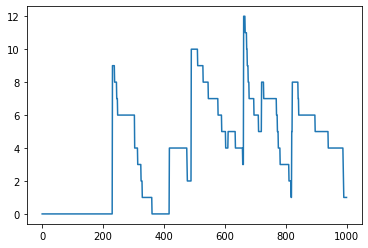

In [22]:
plt.plot(X[0,:,0])

In [95]:
Tau = np.append(tau,T)
X_ = Gillespie_bursty_2D(ncell=nCells, tvec=tvec, x0=np.array([0,0]), kvec=[k[0],k[0]], tau=Tau, beta=k[1], gamma=k[2], bvec=bvec, random_seed = None)

**Get pmf**

In [20]:
mx = [X[:,:,0].max()+10,X[:,:,1].max()+10]
theta = [k[0],k[0],bvec[0],bvec[1],0,0,k[1],k[2]]
Tau = np.append(tau,T)
t1 = time.time()
pmf = np.exp(get_logP(theta, tvec, Tau, mx))
t2 = time.time()
print(t2-t1)

ValueError: too many values to unpack (expected 3)

In [90]:
t1 = time.time()
pmf1 = eval_model_inh_burst_rk(tau,k[0],k[1],bvec,burstfun,tvec,T,mx[0])
t2 = time.time()
print(t2-t1)
#tau,ki,beta,bvec,burstfun,tvec,T,limits

/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


0.25079917907714844


In [91]:
t1 = time.time()
pmf2 = eval_model_inh_burst_cheap(tau,k[0],k[1],bvec,burstfun,tvec,T,mx[0])
t2 = time.time()
print(t2-t1)

0.03802180290222168


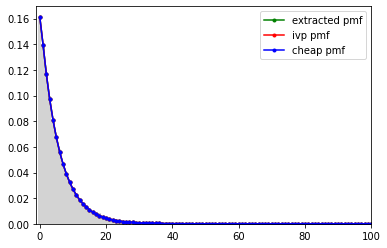

In [92]:
j=-1

bins = np.arange(mx[0])-0.5
_=plt.hist(X[:,j,0],bins=bins,density=True,facecolor='lightgray')

x = np.arange(mx[0])
y = pmf[j].sum(axis=1)
plt.plot(x,y,'g.-',label='extracted pmf')

y = pmf1[j]
plt.plot(x,y,'r.-',label='ivp pmf')

y = pmf2[j]
plt.plot(x,y,'b.-',label='cheap pmf')

#y = scipy.stats.nbinom.pmf(x,k[0]/k[1],1/(1+bvec[-1]))
#plt.plot(x,y,'r.-',label='SS')

plt.legend()
plt.xlim([-1,100]);

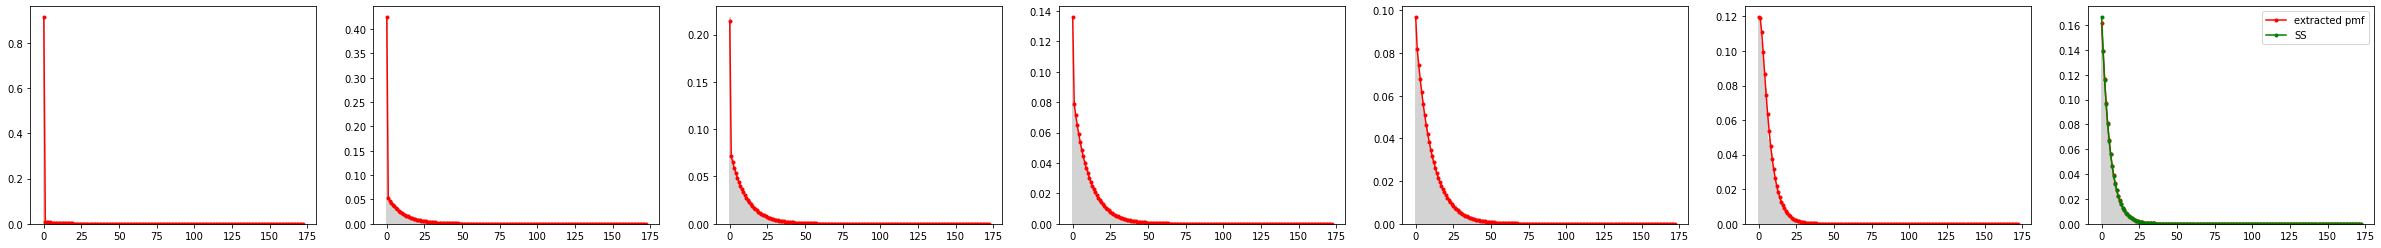

In [93]:
bins = np.arange(mx[0])-0.5
x = np.arange(mx[0])
time_points=[10,100,200,300,500,700,-1]
fig, ax = plt.subplots(1,len(time_points),figsize=(6*len(time_points),4))
for i,j in enumerate(time_points):
    ax[i].hist(X[:,j,0],bins=bins,density=True,facecolor='lightgray')
    y = pmf[j].sum(axis=1)
    ax[i].plot(x,y,'r.-',label='extracted pmf')

y = scipy.stats.nbinom.pmf(x,k[0]/k[1],1/(1+bvec[-1]))
plt.plot(x,y,'g.-',label='SS')

plt.legend();

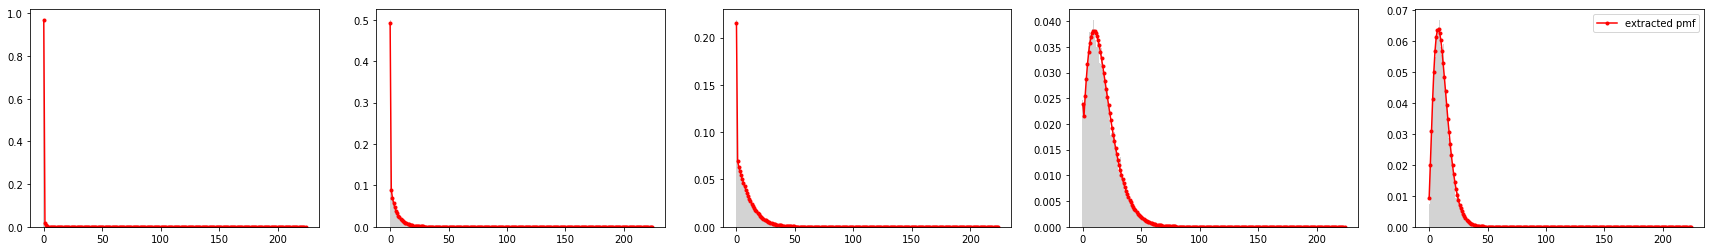

In [96]:
bins = np.arange(mx[1])-0.5
x = np.arange(mx[1])
time_points=[10,100,200,500,1000]
fig, ax = plt.subplots(1,len(time_points),figsize=(6*len(time_points),4))
for i,j in enumerate(time_points):
    ax[i].hist(X_[:,j,1],bins=bins,density=True,facecolor='lightgray')
    y = pmf[j].sum(axis=0)
    ax[i].plot(x,y,'r.-',label='extracted pmf')

plt.legend();
#plt.xlim([-1,100]);

## Inhomogeneous frequency bursty

In [4]:
Tau = [0,0.5,1]
kvec = [10.0, 5.0]
bvec = [10.0, 10.0]
beta, gamma = 10.0, 5.0
nCells = 10000
tvec = np.linspace(0,1,101)

X = Gillespie_bursty_2D(nCells, tvec, np.array([0,0],dtype=int), kvec, Tau, beta, gamma, bvec)

In [5]:
mx = [X[:,:,0].max().astype(int)+10,X[:,:,1].max().astype(int)+10]
theta = kvec+[10,beta,gamma]

In [7]:
t1 = time.time()
pmf_ = get_logP(theta, tvec, Tau, mx)
t2 = time.time()
print(t2-t1)

1.9676308631896973


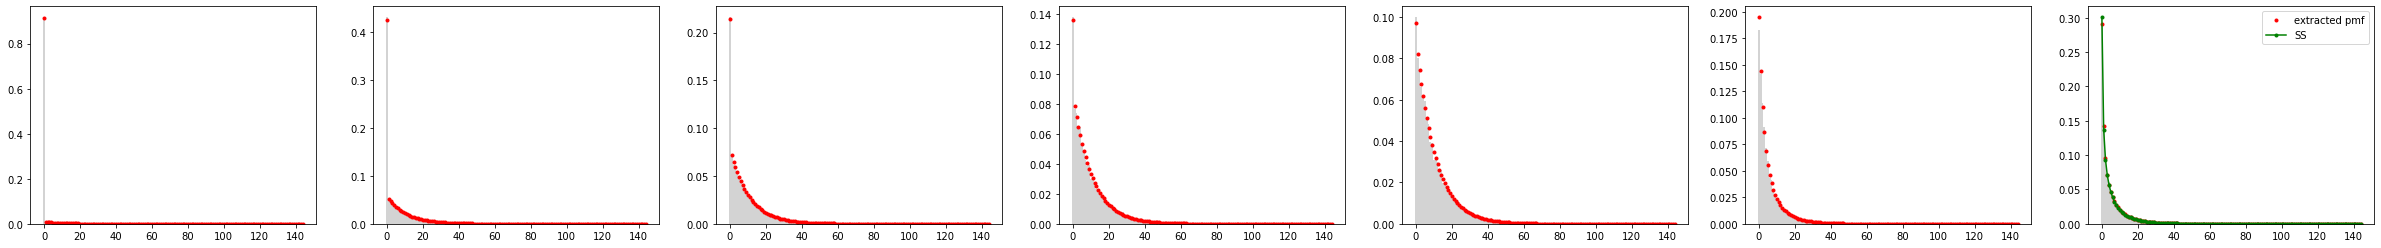

In [8]:
bins = np.arange(mx[0])-0.5
x = np.arange(mx[0])
time_points=np.array(np.array([0.01,0.1,0.2,0.3,0.5,0.7,0.99])*len(tvec),dtype=int)
fig, ax = plt.subplots(1,len(time_points),figsize=(6*len(time_points),4))
for i,j in enumerate(time_points):
    y = pmf_[j].sum(axis=1)
    ax[i].plot(x,y,'r.',label='extracted pmf')
    ax[i].hist(X[:,j,0],bins=bins,density=True,facecolor='lightgray')
    
y = scipy.stats.nbinom.pmf(x,kvec[-1]/beta,1/(1+bvec[-1]))
plt.plot(x,y,'g.-',label='SS')

plt.legend();

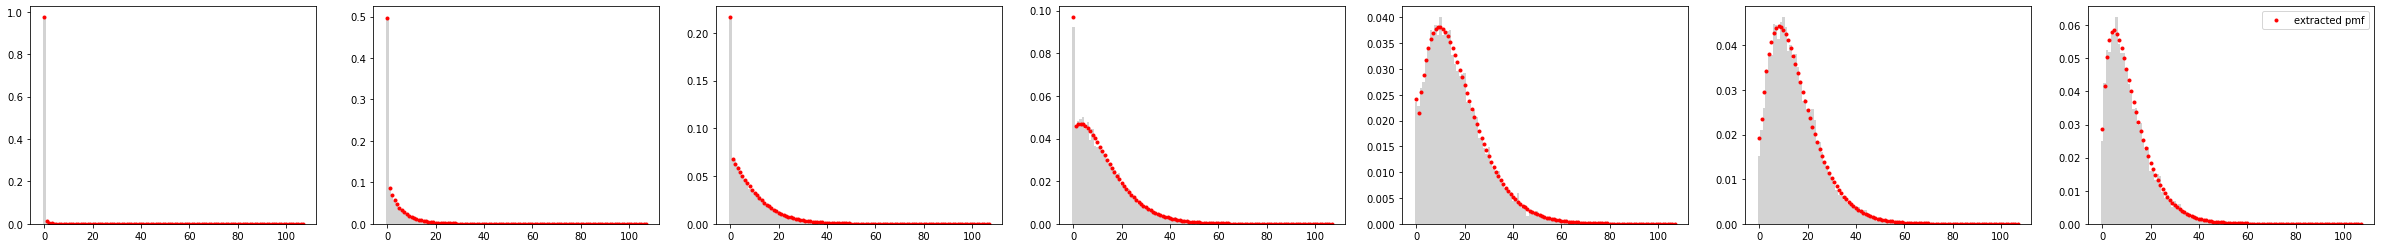

In [9]:
bins = np.arange(mx[1])-0.5
x = np.arange(mx[1])

fig, ax = plt.subplots(1,len(time_points),figsize=(6*len(time_points),4))
for i,j in enumerate(time_points):
    ax[i].hist(X[:,j,1],bins=bins,density=True,facecolor='lightgray')
    y = pmf_[j].sum(axis=0)
    ax[i].plot(x,y,'r.',label='extracted pmf')

plt.legend();
#plt.xlim([-1,100]);